In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST", one_hot=True)
print(mnist)


Extracting ./MNIST/train-images-idx3-ubyte.gz
Extracting ./MNIST/train-labels-idx1-ubyte.gz
Extracting ./MNIST/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c31d33080>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c2ea874a8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c2ea875c0>)


In [7]:
#세팅
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal(([784, 256]), stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256,256], stddev =0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256,10], stddev = 0.01))
model =tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples /batch_size)

for epoch in range(15):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs, Y:batch_ys, keep_prob: 0.8})
    
    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
print('최적화 완료!')

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y:mnist.test.labels, keep_prob:1}))

Epoch: 0001 Avg. cost = 0.000
Epoch: 0002 Avg. cost = 0.000
Epoch: 0003 Avg. cost = 0.000
Epoch: 0004 Avg. cost = 0.000
Epoch: 0005 Avg. cost = 0.000
Epoch: 0006 Avg. cost = 0.000
Epoch: 0007 Avg. cost = 0.000
Epoch: 0008 Avg. cost = 0.000
Epoch: 0009 Avg. cost = 0.000
Epoch: 0010 Avg. cost = 0.000
Epoch: 0011 Avg. cost = 0.000
Epoch: 0012 Avg. cost = 0.000
Epoch: 0013 Avg. cost = 0.000
Epoch: 0014 Avg. cost = 0.000
Epoch: 0015 Avg. cost = 0.000
최적화 완료!
정확도: 0.9755


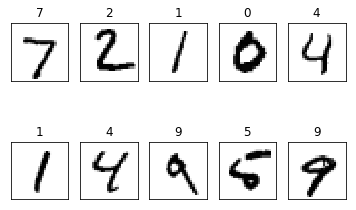

In [8]:
labels = sess.run(model, feed_dict={X: mnist.test.images, Y:mnist.test.labels, keep_prob:1})
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                  cmap=plt.cm.gray_r)

plt.show()
